# CSC12110 - Applied Data Analytics - Project

Ho Chi Minh City University of Science - VNUHCM

-   **Class**: 21HTTT - November 2024
-   **Instructors:** Ph.D. Vu Thi My Hang, MSc. Ho Thi Hoang Vy
-   **Group:** 7


|    ID    | Name               | Tasks                                                                   | Contrib. (%) |
| :------: | :----------------- | :---------------------------------------------------------------------- | :----------: |
| 21127004 | Tran N. An Phong   | Sect. 1.1, 1.4b <br/> Sect. III - 3.1c, 3.2 <br/> Sect. 4.2 - 4.4       |     100      |
| 21127135 | Diep Huu Phuc      | Sect. 1.2 - 1.4a <br/> Sect. II <br/> Sect. 3.1d - 3.1f <br/> Sect. 4.1 |     100      |
| 21127428 | Pham N. Quoc Thanh |                                                                         |      0       |

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from calendar import month_name, day_name

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## <span style="display: none;">I. Data inspection</span>
<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
I. Data inspection
</div>

### 1.1. Loading Data

#### 1.1a. Overview

In [2]:
df_ads = pd.read_csv('2425_QC.csv')
df_ads.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0


In [3]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1002 non-null   float64
 1   Age                       1001 non-null   float64
 2   Area Income               1002 non-null   float64
 3   Daily Internet Usage      1002 non-null   float64
 4   Ad Topic Line             1002 non-null   object 
 5   City                      1002 non-null   object 
 6   Male                      1002 non-null   int64  
 7   Country                   1002 non-null   object 
 8   Timestamp                 1002 non-null   object 
 9   Clicked on Ad             1002 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.4+ KB


- The dataset contains **1002 rows** and **10 columns**, of which *6* are `numerical` and *4* `object`.
- `City` and `Country` can be treated as *categorical* while it will be unnatural to do so for `Ad Topic Line` and `Timestamp`.

In [4]:
df_ads.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1002.000000,1001.000000,1002.000000,1002.000000,1002.000000,1002.00000
mean,64.988303,36.024975,55001.837565,180.031637,0.481038,0.50000
std,15.870862,8.785692,13401.410392,43.893820,0.499890,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.320000,29.000000,47073.067500,138.905000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.562500,42.000000,65451.787500,218.797500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


- The data was collected from participants **aged between 19 and 61**, but **mainly below 50** (based on mean value).
- `Daily Time Spent on Site` and `Daily Internet Usage` are surely **measured in minute** (as each Timestamp shows a date yet these values exceed 24 if considering hour).
- `Gender` is **equally distributed** among participants. This also applies for `Clicked on Ad`.

#### 1.1b. Insights on object-type features

In [5]:
print("Number of unique cities: ", df_ads['City'].nunique())
print("Number of unique countries: ", df_ads['Country'].nunique())

print("Number of unique Ad topic lines: ", df_ads['Ad Topic Line'].nunique())

timestamps = pd.to_datetime(df_ads['Timestamp'], format='%d/%m/%Y %H:%M')
timestamps.dt.year.unique()
print("Years: ", timestamps.dt.year.unique())

Number of unique cities:  969
Number of unique countries:  237
Number of unique Ad topic lines:  1000
Years:  [2016]


- The dataset is compiled from **969 cities** within **237 countries** around the world.

- The values in the `Ad topic line` are literally unique for each row. For its type of `object`, the column's data proves difficult for useful information to be extracted.

- The data spans solely in **2016**, thus it is appropriate to **remove Year** from features affecting the Ad clicking rate.

### 1.2. Distribution of non-object features

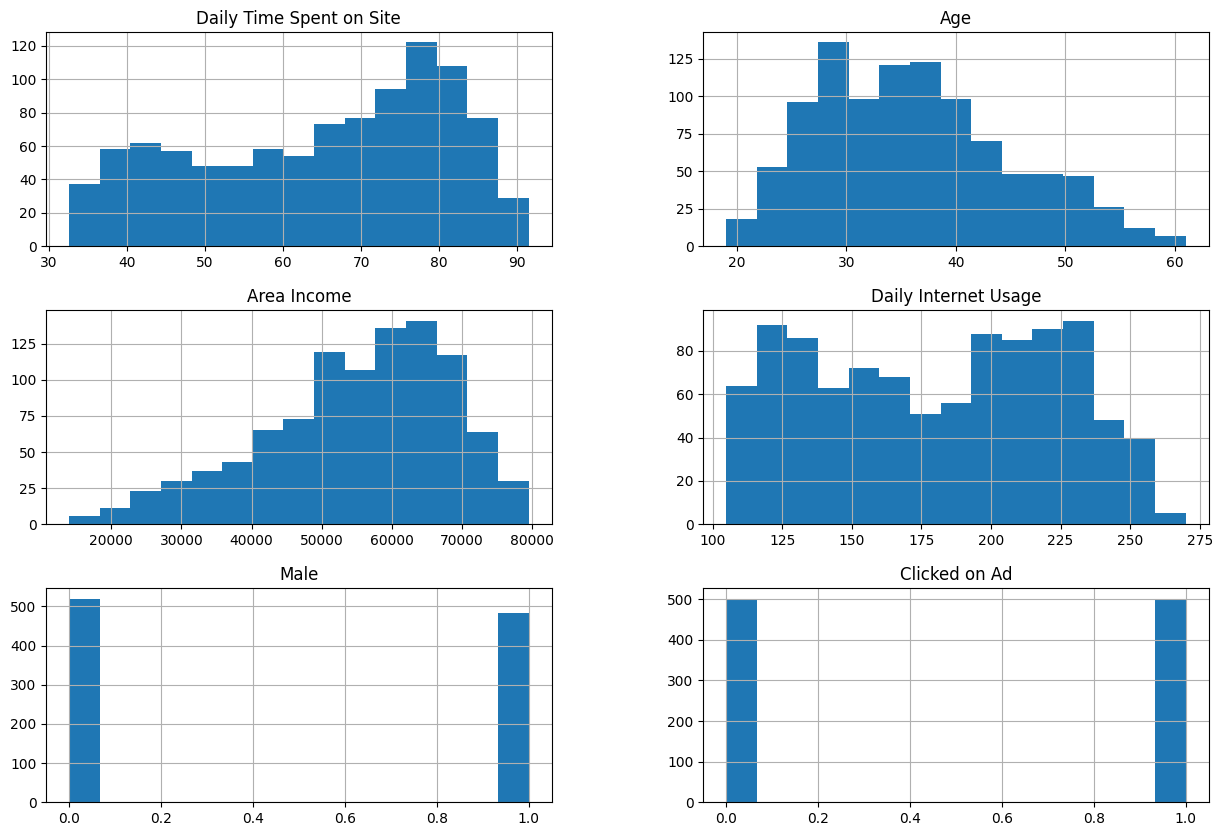

In [6]:
df_ads.hist(bins=15, figsize=(15, 10))
plt.show()

1. **Daily Time Spent on Site:** The distribution skews slightly to the right. Most users spend roughly 70 to 80 minutes daily, with fewer spending less than 40 or more than 90 minutes.

1. **Age**: This distribution appears quite normal, centered around younger adults of 30 year old, with not many people below 20 or above 50.

1. **Area Income:** There is a peak near 60000, indicating a rather well-off user base.

1. **Daily Internet Usage:** With no obvious peak, the distribution seems fairly uniform, ranging between 100 to 250 minutes, implying users spend varying amounts of time online daily. The transition above 250 is rough.

1. **Male:** This variable is binary and shows that there are slightly more female users.

1. **Clicked on Ad:** This is also a binary feature and suggests an even distribution between the people clicking and those who did not. Our dataset is comprised of an equal numbers between two cases.

### 1.3. Missing values and duplicate rows

In [7]:
print("-- Missing values in each column:")
print(df_ads.isnull().sum())
print("\n-- Number of duplicate rows: ", df_ads.duplicated().sum())

-- Missing values in each column:
Daily Time Spent on Site    0
Age                         1
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

-- Number of duplicate rows:  2


### 1.4. Outliers

#### 1.4a. Boxplots

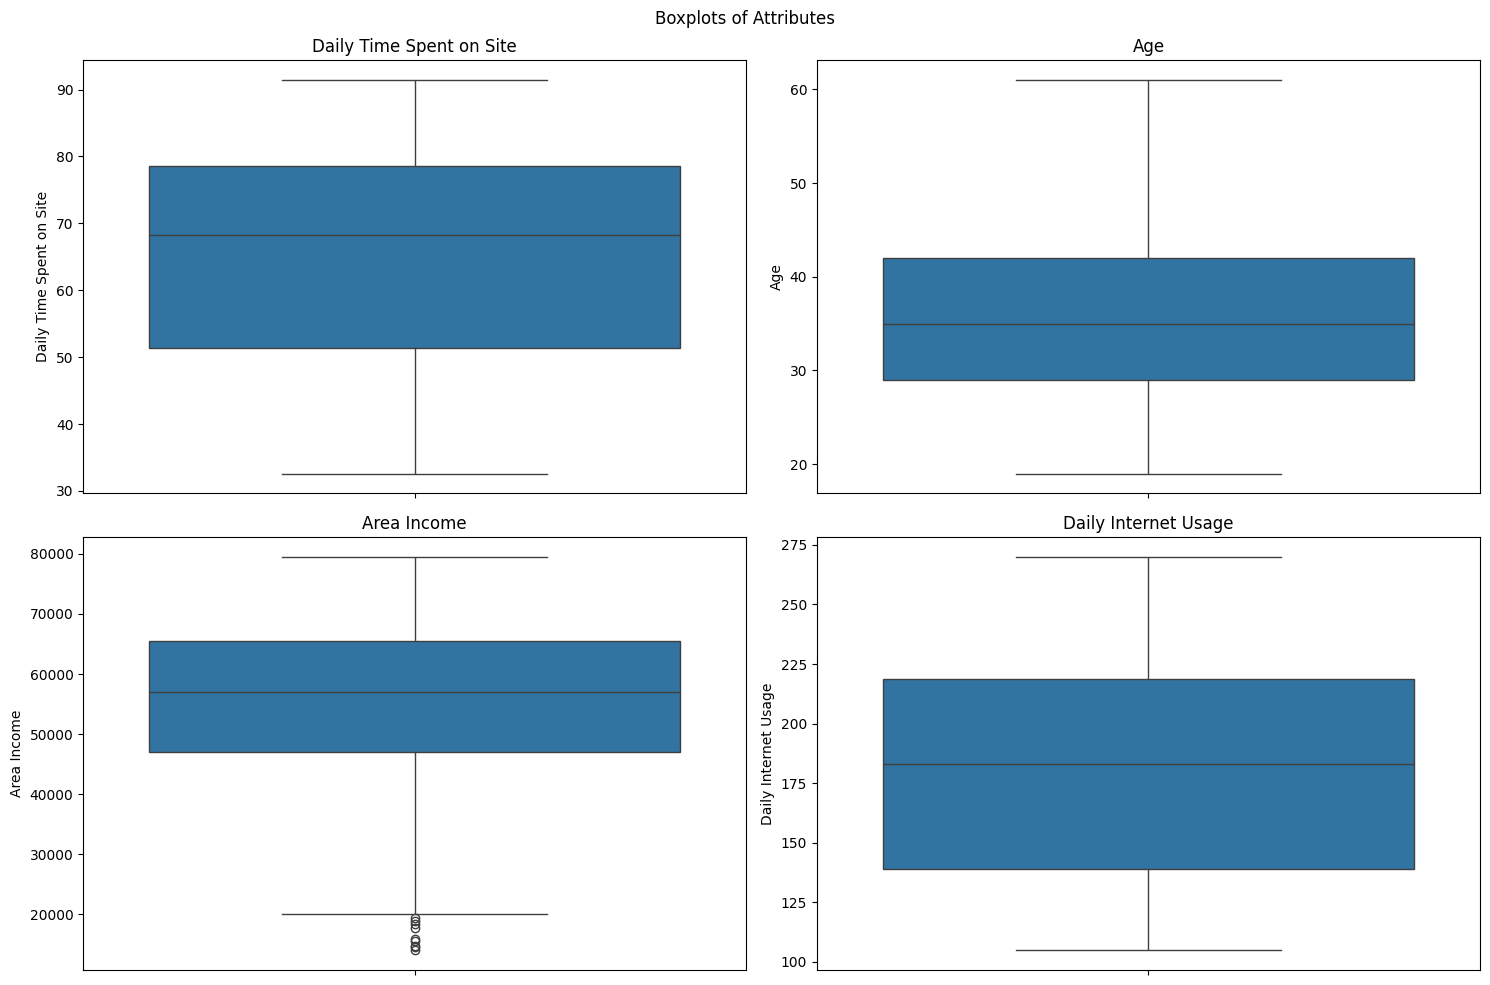

In [8]:
attrs = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplots of Attributes')

for i, attr in enumerate(attrs):
    row, col = divmod(i, 2)
    sns.boxplot(df_ads[attr], ax=axes[row, col])
    axes[row, col].set_title(attr)

plt.tight_layout()
plt.show()

- Despite the smooth transition curve in `Area Income`, its plot indicated that **outliers exist in the income range below 20000**.
- There is no obvious outliers spotted in the rest.

#### 1.4b. IQR method

Boxplot can only hint about which feature may contain outliers. For more precision, we need to use Interquartile range (IQR).

In [9]:
def calc_IQR_limits(feature):
    Q1 = df_ads[feature].quantile(0.25)
    Q3 = df_ads[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit

def get_outliers_IQR(feature):
    lower_limit, upper_limit = calc_IQR_limits(feature)
    return df_ads[(df_ads[feature] < lower_limit)
                  | (df_ads[feature] > upper_limit)]

def print_outliers(feature):
    print(f'-- {feature}')
    outliers = get_outliers_IQR(feature)
    print('Count: ', outliers.shape[0])
    if outliers.shape[0] > 0:
        print('Outliers:')
        print(outliers[feature])

In [10]:
for att in attrs: print_outliers(att)

-- Daily Time Spent on Site
Count:  0
-- Age
Count:  0
-- Area Income
Count:  9
Outliers:
135    17709.98
410    19345.36
510    18819.34
640    15598.29
665    15879.10
692    14548.06
769    13996.50
779    14775.50
953    18368.57
Name: Area Income, dtype: float64
-- Daily Internet Usage
Count:  0


Only **Area Income** displays outliers on the lower end (below 20000), supporting its earlier boxplot.

## <span style="display: none;">II. Duplications, missing values and outliers handling</span>
<div style="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
II. Duplications, missing values and outliers handling
</div>

### 2a. Dropping duplicates and filling missing values

- There are only two **duplicated rows** in the datasets, so it is safe to simply drop them.
- Although **Age**'s distribution appears roughly symmetric and doesn't show any significant outliers, which enables replacing with **mean**, it doesn't make sense for age to not be integer. Thus, we opt for **median**.

In [11]:
df_ads = df_ads.drop_duplicates()
df_ads['Age'] = df_ads['Age'].fillna(df_ads['Age'].median())

### 2b. Handle outliers

**Area Income**'s outliers are handled with **IQR** and **Capping** methods.

In [12]:
area_income_org = df_ads['Area Income']

lower_bound, upper_bound = calc_IQR_limits('Area Income')

df_ads['Area Income'] = df_ads['Area Income'].apply(
    lambda x: lower_bound if x < lower_bound
        else upper_bound if x > upper_bound else x
)

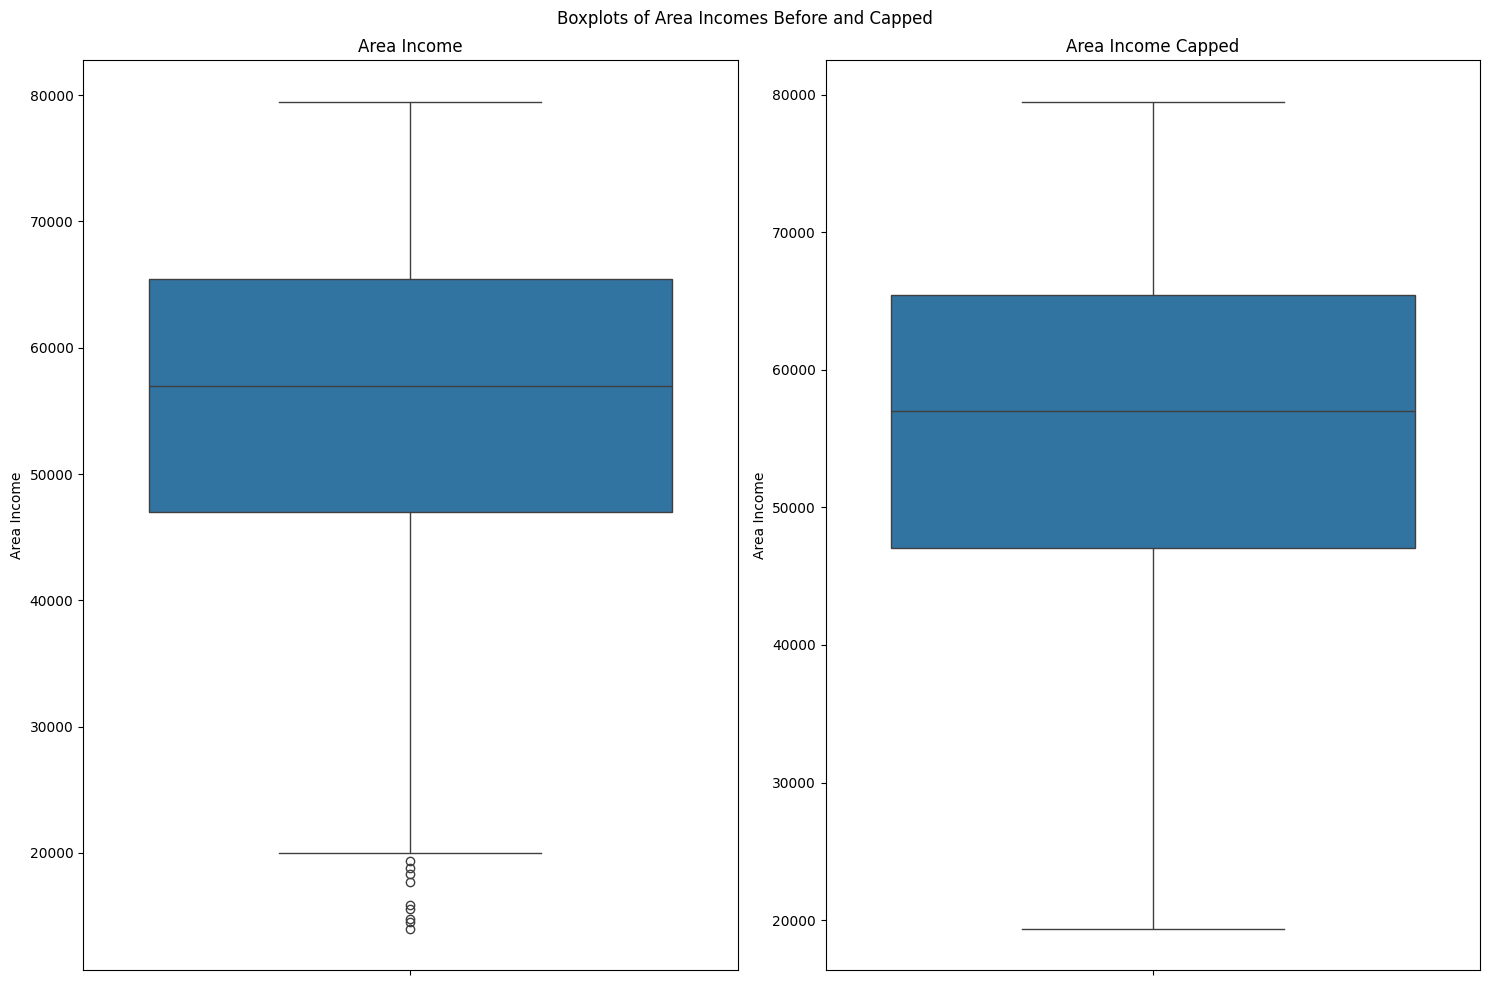

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Boxplots of Area Income''s Before and Capped')

sns.boxplot(area_income_org, ax=axes[0])
axes[0].set_title('Area Income')
sns.boxplot(df_ads['Area Income'], ax=axes[1])
axes[1].set_title('Area Income Capped')

plt.tight_layout()
plt.show()

## <span style="display: none;">III. EDA</span>
<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
III. EDA
</div>

Many **univariate analyses have been conducted in previous sections**, here we focus on the **relationships between different features (Bivariate analyses)**.

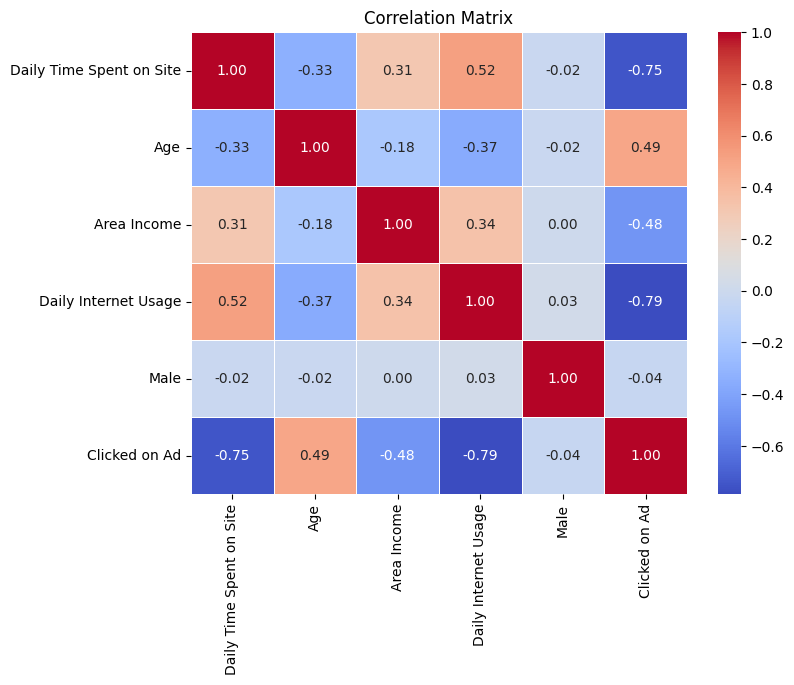

In [14]:
# Exclude boolean columns
numerical_df_exclude_bool = df_ads.select_dtypes(exclude=['object'])
corr_matrix = numerical_df_exclude_bool.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The matrix shows that, save for `Male` (i.e., Gender), all features share very high correlation with `Clicked on Ad`.

### 3.1. Bivariate analysis

#### 3.1a. `Age` and `Clicked on Ad`

<Axes: xlabel='Clicked on Ad', ylabel='Age'>

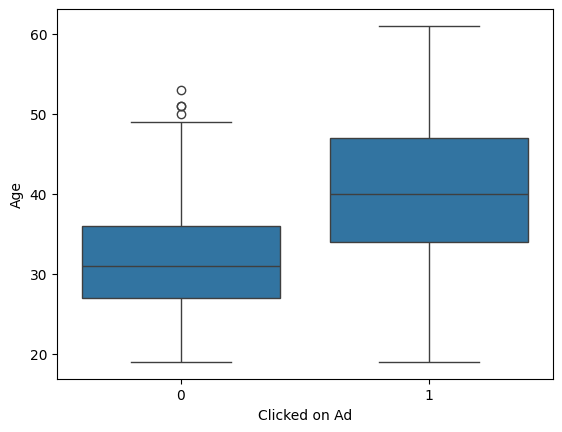

In [15]:
sns.boxplot(data=df_ads, x='Clicked on Ad', y='Age')

The plot suggests that individuals who clicked on ads tend to be older (over 40yo), with a higher median and a wider age range compared to those who did not.

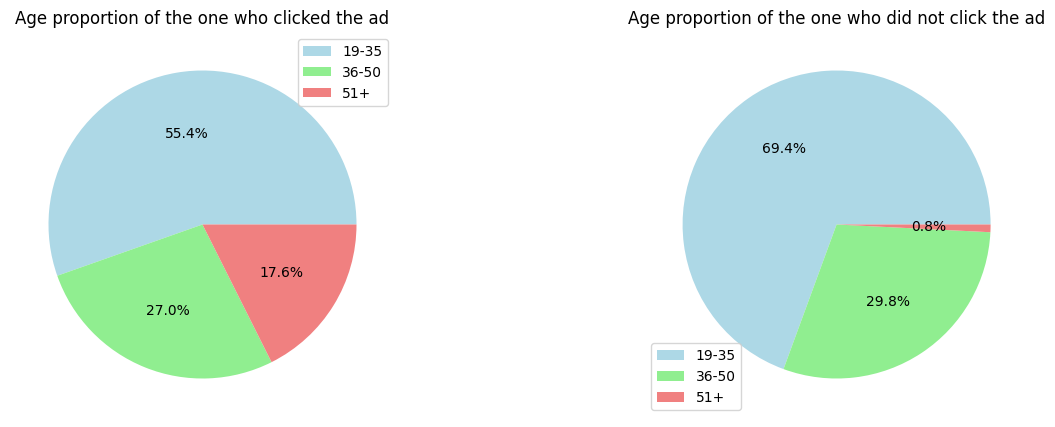

In [16]:
# Define age bins and labels
bins = [19, 35, 50, 100]  # Age groups: 19-35, 36-50, 51+
labels = ['19-35', '36-50', '51+']
df_ads['Age Group'] = pd.cut(df_ads['Age'], bins=bins, labels=labels, right=False)

true_clicked_df = df_ads[df_ads['Clicked on Ad'] == 1]
false_clicked_df = df_ads[df_ads['Clicked on Ad'] == 0]

age_group_counts_true = true_clicked_df['Age Group'].value_counts()
age_group_counts_false = false_clicked_df['Age Group'].value_counts()

fig = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

# Plotting the proportion pie chart
plt.subplot(1,2,1)
plt.pie(age_group_counts_true, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.legend(['19-35', '36-50', '51+'])
plt.title('Age proportion of the one who clicked the ad')

plt.subplot(1,2,2)
plt.pie(age_group_counts_false, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.legend(['19-35', '36-50', '51+'])
plt.title('Age proportion of the one who did not click the ad')

# Show the plot
plt.show()

While the **middle age group (36-50) does not lean toward either side** of the decision, both **remaining groups do**. `Age` appears to be one major factor when it comes to whether a person clicks on ads, since old people are more willing to.

#### 3.1b. `Area Income` and `Clicked on Ad`

<Axes: xlabel='Clicked on Ad', ylabel='Area Income'>

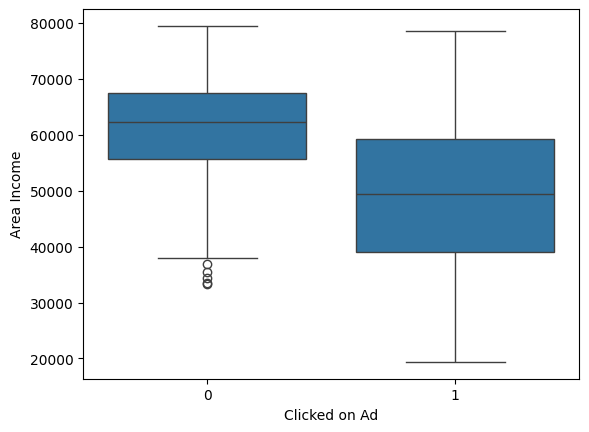

In [17]:
sns.boxplot(data=df_ads, x='Clicked on Ad', y='Area Income')

It can be inferred that people with higher income are less likely to click on ads.

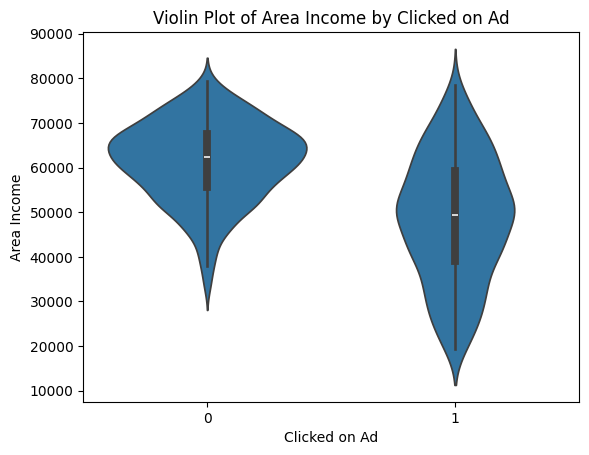

In [18]:
sns.violinplot(x="Clicked on Ad", y="Area Income", data=df_ads)
plt.title("Violin Plot of Area Income by Clicked on Ad")
plt.show()

- The distribution for those not clicking on ads is concentrated mainly between $60,000 and $70,000, indicating a more focused income range.
- In contrast, people who clicked are more evenly spread across all income levels. This suggests that **area income might reflect a person's occupation**, and **certain job groups may feel less inclined to interact with ads**.

- `Area Income` greatly influence the likelihood of ads clicking. Individuals with **higher incomes** (particularly between $60,000 and $70,000) are **less likely to engage with ads**. Conversely, those with **lower earnings** (esp. less than $30,000) exhibit a **greater tendency for clicking**.

#### 3.1c. `Male` (Gender) and `Clicked on Ad`

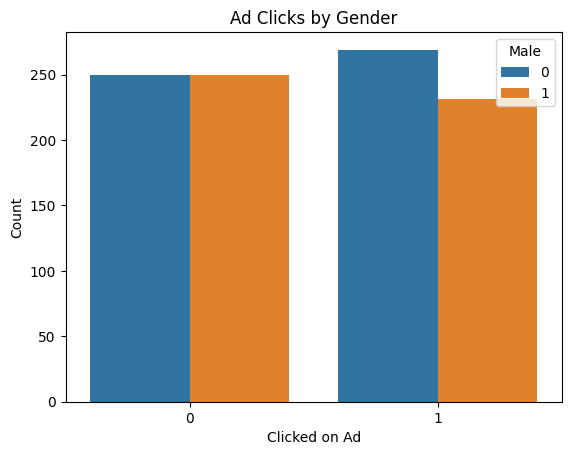

In [19]:
sns.countplot(x="Clicked on Ad", hue="Male", data=df_ads)
plt.title("Ad Clicks by Gender")
plt.xlabel("Clicked on Ad")
plt.ylabel("Count")
plt.show()

Male and female share nearly **equal counts on both sides of the ad-clicking scenario**, implying that **gender does not play a huge role** in determining whether ads are clicked. Together with the [low correlation shown](#iii-eda), we elect to shelve this feature.

In [20]:
df_ads = df_ads.drop(columns=['Male'])

#### 3.1d. `Daily Time Spent on Site` and `Clicked on Ad`

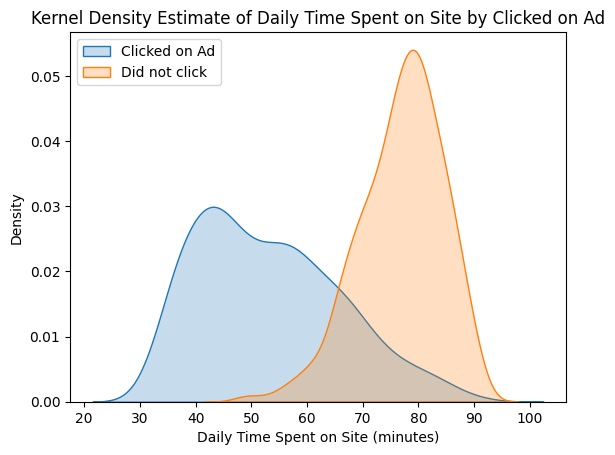

In [21]:
sns.kdeplot(data=df_ads[df_ads['Clicked on Ad'] == 1], x='Daily Time Spent on Site',
            label='Clicked on Ad', fill=True)
sns.kdeplot(data=df_ads[df_ads['Clicked on Ad'] == 0], x='Daily Time Spent on Site',
            label='Did not click', fill=True)
plt.title('Kernel Density Estimate of Daily Time Spent on Site by Clicked on Ad')
plt.xlabel('Daily Time Spent on Site (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()

- The plot indicates a clear shift in daily time spent between the two sides. For **users who clicked** on ads, the peak density is **concentrated on the lower end** (around 40–60 minutes).
- In opposition, **users not clicking** have their peak density **lean toward the higher end** (approximately 70–90 minutes).
-  A strong relationship between the amount of time spent on the site and the likelihood of clicking on ads can be drawn, where users with less time are more prone to clicking.

#### 3.1e. `Daily Time Spent on Site` and `Age`

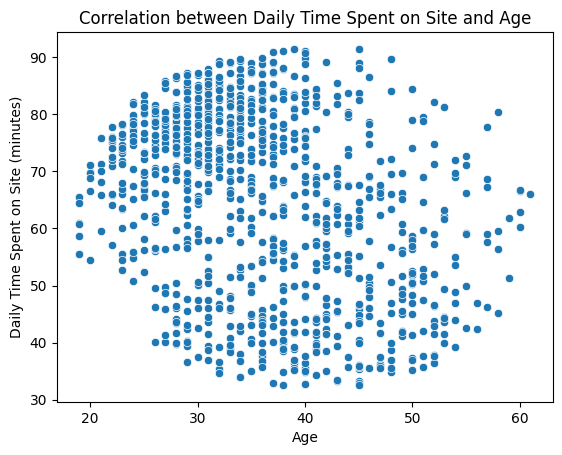

In [22]:
sns.scatterplot(x='Age', y='Daily Time Spent on Site', data=df_ads)
plt.title('Correlation between Daily Time Spent on Site and Age')
plt.xlabel('Age')
plt.ylabel('Daily Time Spent on Site (minutes)')
plt.show()

- Expectedly, the scatter plot shows a nearly circular pattern for the correlation between `Daily Time Spent on Site` and `Age`.
- The **top-left quadrant** is notably more **densely populated**, indicating that **younger** individuals tend to **spend more time daily**.
- In contrast, the density decreases significantly for older individuals, particularly those above 50 years, who rarely spend substantial time on the site.

#### 3.1f. `City` and `Clicked on Ad`

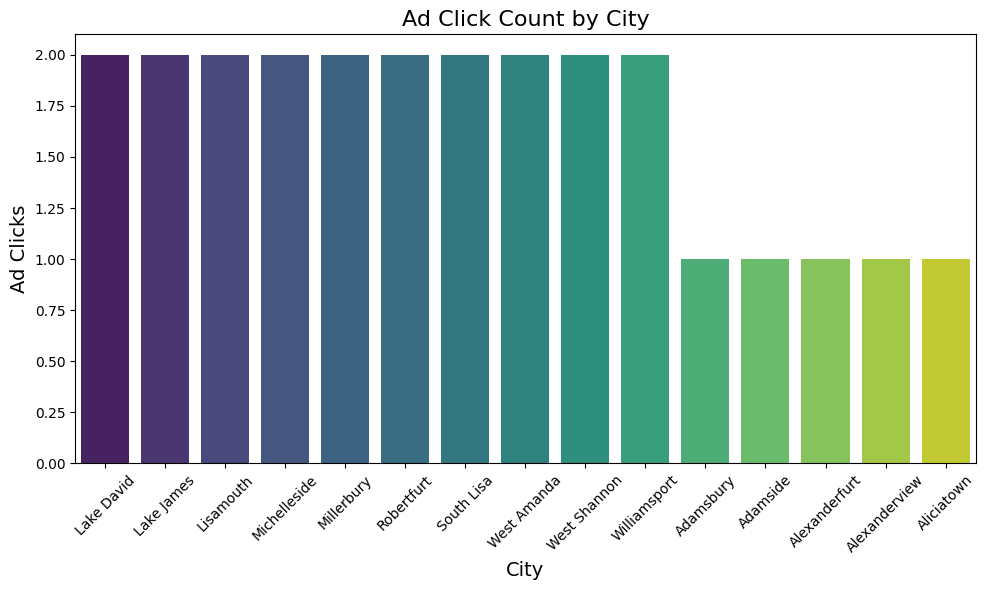

In [23]:
clicked_count = df_ads[df_ads['Clicked on Ad'] == 1] \
                .groupby('City')['Clicked on Ad'].sum()

# Reset index for plotting
# Only take 15 cities with the most count as there are too many cities
clicked_count = clicked_count.nlargest(15).reset_index(name='Ad Clicks')

plt.figure(figsize=(10, 6))
sns.barplot(data=clicked_count, x='City', y='Ad Clicks',
            palette='viridis', hue='City')

plt.title('Ad Click Count by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Ad Clicks', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

- While some cities do show up twice, most of them appear only once, reinforcing our previous assumption that `City` is irrelevant to ad clicks.
- The same case is even more true for `Ad Topic Line` for it literally houses all unique rows.

### 3.2 Breakdown of `Timestamp`

`Timestamp` is comprised of multiple elements, i.e., day, month, year, hour, and minute. By stripping it into these base components, we might attain more meaningful insights.

In [24]:
df_ads['Timestamp'] = pd.to_datetime(df_ads['Timestamp'], format='%d/%m/%Y %H:%M')

# Create new columns, ignoring Year since we know there is only 2016
df_ads['Day of Week'] = df_ads['Timestamp'].dt.day_name()
df_ads['Day of Month'] = df_ads['Timestamp'].dt.day
df_ads['Month'] = df_ads['Timestamp'].dt.month

# Round Hour and Minute to only Hour
df_ads['Hour'] = df_ads['Timestamp'].dt.hour

# Check the last 4 columns
print(df_ads.iloc[:, -4:])

     Day of Week  Day of Month  Month  Hour
0         Sunday            27      3     0
1         Monday             4      4     1
2         Sunday            13      3    20
3         Sunday            10      1     2
4         Friday             3      6     3
...          ...           ...    ...   ...
996     Thursday            11      2    21
997       Friday            22      4     2
998       Monday             1      2    17
999     Thursday            24      3     2
1000      Friday             3      6    21

[1000 rows x 4 columns]


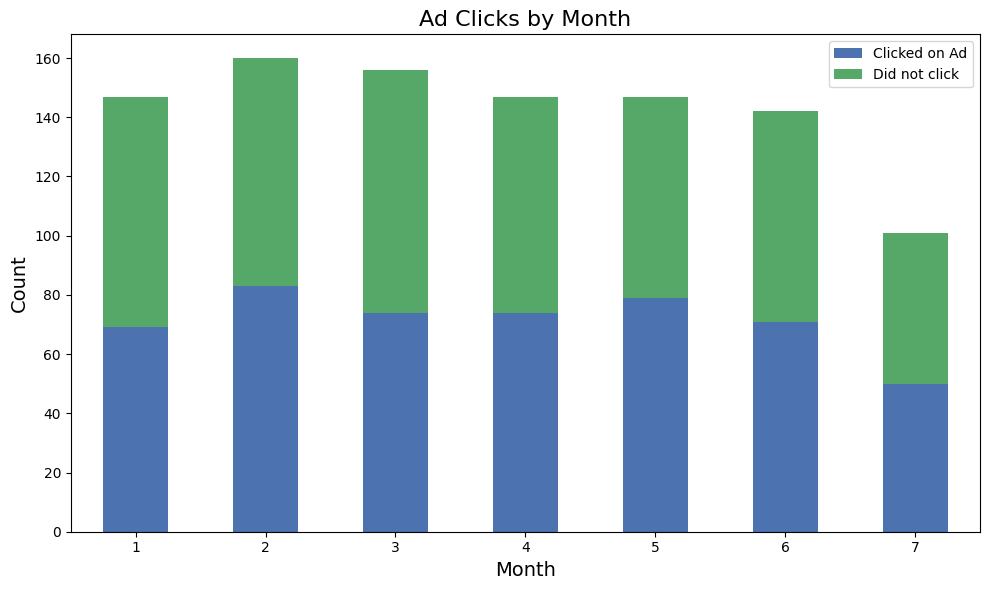

In [25]:
# Group by Month and sum both 'Clicked on Ad' and 'Did not click' counts
df_ads['Did not click'] = 1 - df_ads['Clicked on Ad']
ad_clicks_by_month = df_ads.groupby('Month')[['Clicked on Ad', 'Did not click']] \
                           .sum().reset_index()

plt.figure(figsize=(10, 6))
ad_clicks_by_month.set_index('Month').plot(
    kind='bar', stacked=True, color=['#4c72b0', '#55a868'], ax=plt.gca())

plt.title('Ad Clicks by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

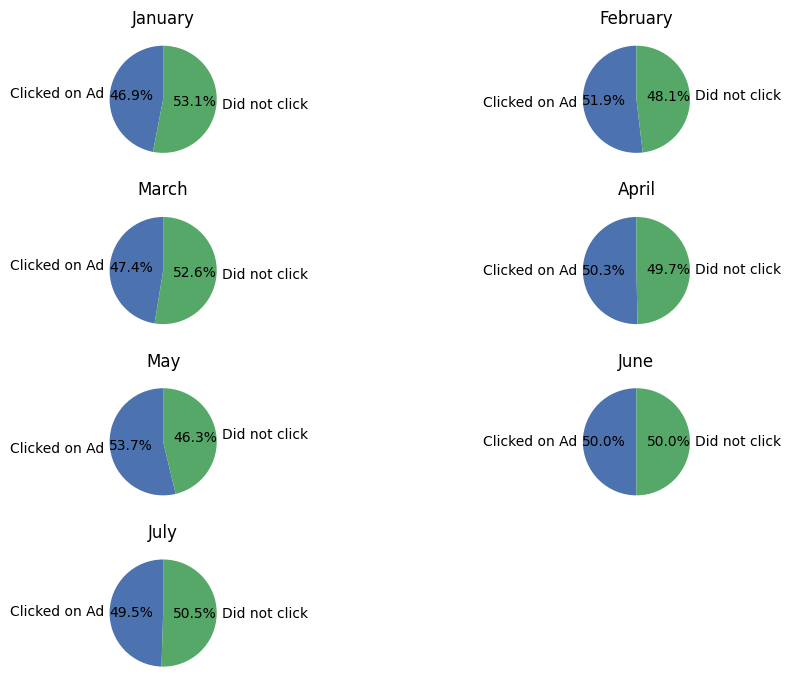

In [26]:
fig, axes = plt.subplots(4, 2, figsize=(10, 7))
axes = axes.flatten() # Flatten to easily access individual subplots

for i, month in enumerate(ad_clicks_by_month['Month']):
    month_data = ad_clicks_by_month[ad_clicks_by_month['Month'] == month]

    # Values for the pie chart
    clicked = month_data['Clicked on Ad'].values[0]
    not_clicked = month_data['Did not click'].values[0]

    axes[i].pie([clicked, not_clicked], labels=['Clicked on Ad', 'Did not click'],
                autopct='%1.1f%%', colors=['#4c72b0', '#55a868'], startangle=90)
    axes[i].set_title(month_name[month], fontsize=12)

# Remove the last empty subplot (since we only have 7 months)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In spite of some notable imbalances in the click rate for certain months (January, March, May), the ratio usually stays around 1:1.

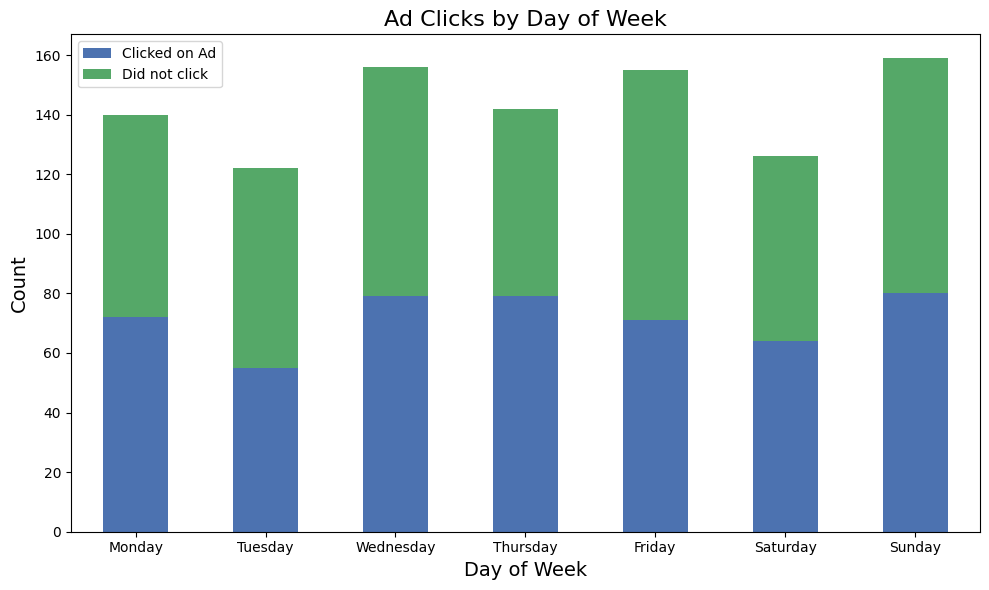

In [27]:
# Group by Day of Week and sum both 'Clicked on Ad' and 'Did not click' counts
ad_clicks_by_day = df_ads.groupby('Day of Week')[['Clicked on Ad', 'Did not click']] \
                         .sum().reset_index()

day_order = list(day_name)

plt.figure(figsize=(10, 6))
ad_clicks_by_day.set_index('Day of Week').loc[day_order].plot(
    kind='bar', stacked=True, color=['#4c72b0', '#55a868'], ax=plt.gca())

plt.title('Ad Clicks by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

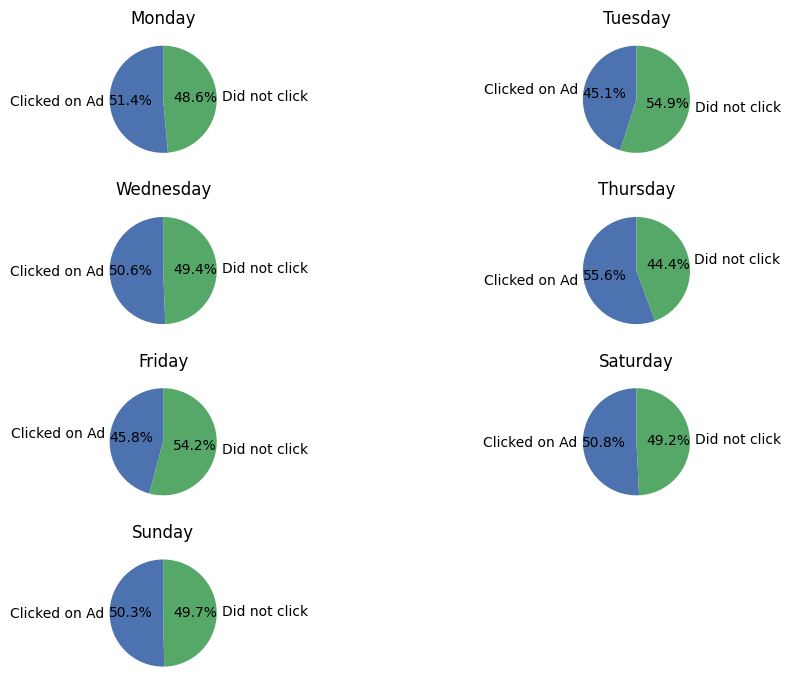

In [28]:
fig, axes = plt.subplots(4, 2, figsize=(10, 7))
axes = axes.flatten() # Flatten to easily access individual subplots

for i, day in enumerate(day_order):
    day_data = ad_clicks_by_day[ad_clicks_by_day['Day of Week'] == day]

    # Values for the pie chart
    clicked = day_data['Clicked on Ad'].values[0]
    not_clicked = day_data['Did not click'].values[0]

    axes[i].pie([clicked, not_clicked], labels=['Clicked on Ad', 'Did not click'],
                autopct='%1.1f%%', colors=['#4c72b0', '#55a868'], startangle=90)
    axes[i].set_title(f'{day}', fontsize=12)

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

The same situation can be observed for weekdays. The click ratio varies slightly between days, with Thursday having the highest ratio and Tuesday the lowest.

In [29]:
def map_time_of_day(hour):
    if hour >= 21 or hour < 5: return 'Night'
    if hour < 9: return 'Morning'
    if hour < 12: return 'Noon'
    if hour < 17: return 'Afternoon'
    return 'Evening'

time_of_day_order = ['Morning', 'Noon', 'Afternoon', 'Evening', 'Night']

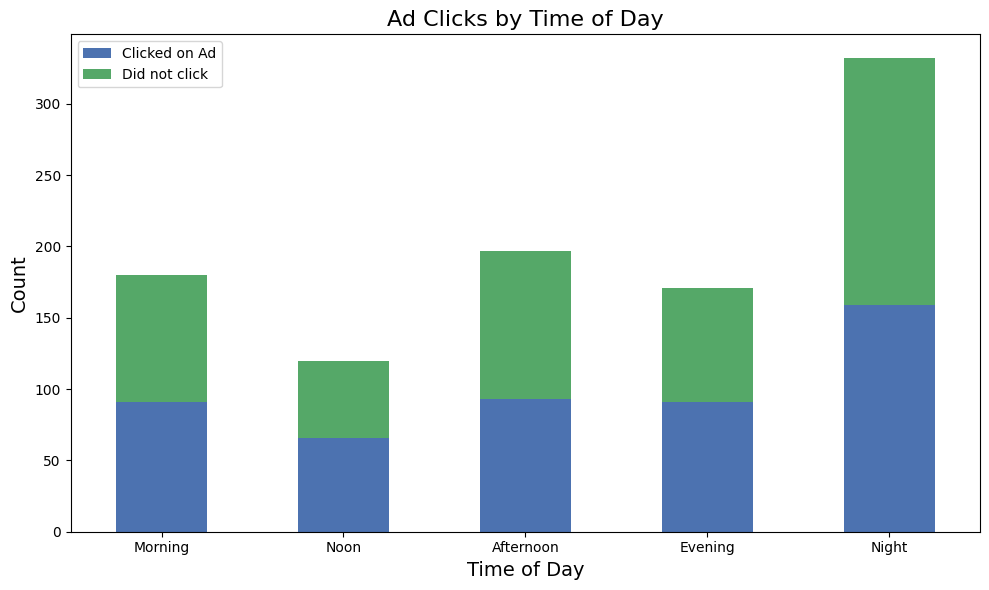

In [30]:
# Map Hour to create a new TimeOfDay column
df_ads['TimeOfDay'] = df_ads['Hour'].apply(map_time_of_day)

# Group by 'TimeOfDay' and sum both 'Clicked on Ad' and 'Did not click' counts
ad_clicks_by_time_of_day = df_ads.groupby('TimeOfDay')[
    ['Clicked on Ad', 'Did not click']].sum().reset_index()

plt.figure(figsize=(10, 6))
ad_clicks_by_time_of_day.set_index('TimeOfDay').loc[time_of_day_order].plot(
    kind='bar', stacked=True, color=['#4c72b0', '#55a868'], ax=plt.gca())

plt.title('Ad Clicks by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

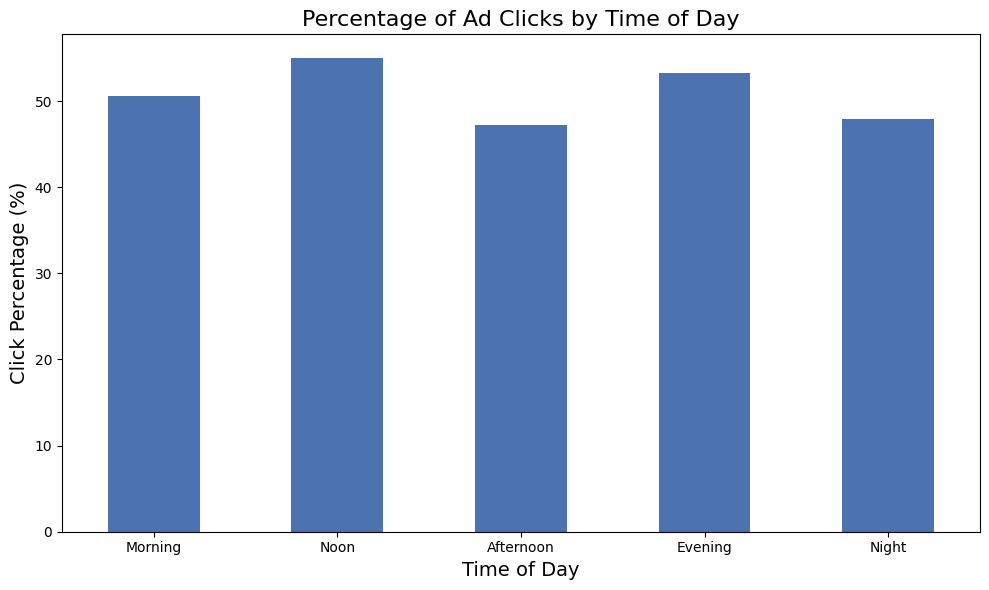

In [31]:
ad_clicks_by_time_of_day = df_ads.groupby('TimeOfDay')[
    ['Clicked on Ad', 'Did not click']].sum().reset_index()

# Calculate the total for each TimeOfDay group for click percentage
ad_clicks_by_time_of_day_total = ad_clicks_by_time_of_day['Clicked on Ad'] \
                                + ad_clicks_by_time_of_day['Did not click']

# Calculate the click percentage
ad_clicks_by_time_of_day['Clicked on Ad (%)'] = \
    ad_clicks_by_time_of_day['Clicked on Ad'] \
    / ad_clicks_by_time_of_day_total * 100

plt.figure(figsize=(10, 6))
ad_clicks_by_time_of_day.set_index('TimeOfDay')['Clicked on Ad (%)'] \
    .loc[time_of_day_order] \
    .plot(kind='bar', color='#4c72b0', ax=plt.gca())

plt.title('Percentage of Ad Clicks by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Click Percentage (%)', fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

- While `Night` holds an **extremely lofty number of records**, its ad **click percentage is not higher than any other time** group's.
- It seems that the time feature does not significantly impact the likelihood of clicking on ads.

## <span style="display: none;">IV. Prediction Model</span>
<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
IV. Prediction Model
</div>

### 4.1. Impacts of features
#### 4.1a. `Area Income`

In [32]:
X = df_ads[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = df_ads['Clicked on Ad']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

X_train_xai = X_train.loc[:, X_train.columns != 'Area Income']
X_test_xai = X_test.loc[:, X_test.columns != 'Area Income']

model_lr = LogisticRegression(max_iter=500)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

def print_acc_area_income(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model.fit(X_train_xai, y_train)
    y_pred_xai = model.predict(X_test_xai)

    print(f'With Area Income: {accuracy_score(y_test, y_pred)}')
    print(f'Without Area Income: {accuracy_score(y_test, y_pred_xai)}')

In [33]:
print('-- Logistic Regression\'s Accuracy')
print_acc_area_income(model_lr)

print('-- Random Forest\'s Accuracy')
print_acc_area_income(model_rf)

-- Logistic Regression's Accuracy
With Area Income: 0.95
Without Area Income: 0.93
-- Random Forest's Accuracy
With Area Income: 0.935
Without Area Income: 0.93


- Both models (`Logistic Regression` and `Random Forest Classifier`) output slightly worse accuracies when `Area Income` is dropped.
- Conclusively, `Area Income` does cast **a positive effect** on the models. Therefore, it will have a place in our classification model.

#### 4.1b. On Random Forest

With feature correlations having been previously discussed, here we focus on the importance of each feature in our classification model for predicting ad-clicking intention.

                    Feature  Importance
3      Daily Internet Usage    0.482215
0  Daily Time Spent on Site    0.356543
2               Area Income    0.100694
1                       Age    0.060548


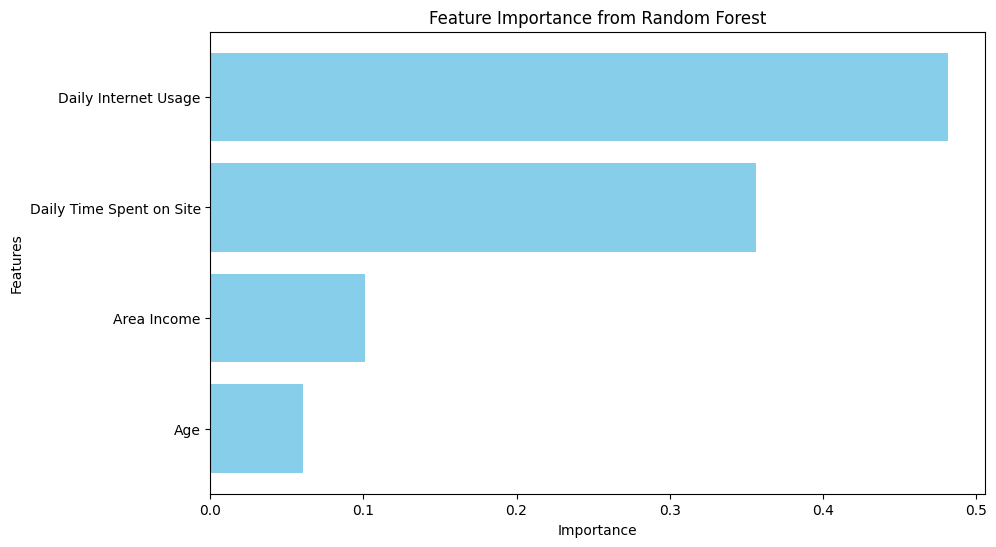

In [34]:
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'],
         color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

- `Daily Internet Usage` and `Daily Time Spent on Site` appear to be the most significant contributors to the ad-clicking rate.
- Though less important, `Area Income` and `Age` still play a role in determining the outcome.

### 4.2. K-Fold Cross Validation

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scoring = ['precision', 'recall', 'f1']

def print_cross_val_results(model, X_train, y_train, scoring=scoring):
    cv_results = cross_validate(model, X_train, y_train, cv=5,
                                scoring=scoring, return_train_score=False)

    for sc in scoring:
        print(f"Cross-validated {sc.capitalize()}: "
              + f"{cv_results[f'test_{sc}'].mean():.4f} ± "
              + f"{cv_results[f'test_{sc}'].std():.4f}")

In [36]:
print('-- Logistic Regression')
print_cross_val_results(model_lr, X_train_scaled, y_train)

print('-- Random Forest Classification')
print_cross_val_results(model_rf, X_train, y_train)

-- Logistic Regression
Cross-validated Precision: 0.9819 ± 0.0129
Cross-validated Recall: 0.9589 ± 0.0338
Cross-validated F1: 0.9699 ± 0.0174
-- Random Forest Classification
Cross-validated Precision: 0.9689 ± 0.0212
Cross-validated Recall: 0.9511 ± 0.0297
Cross-validated F1: 0.9597 ± 0.0206


- Logistic Regression model performs slightly better than its Random Forest counterpart, likely due to the advantage of scaling.
- The performance lead across all metrics is approximately 10%.

### 4.3. Train/Test Validation

In [37]:
model_lr.fit(X_train_scaled, y_train)
y_pred = model_lr.predict(X_test_scaled)

print("-- Logistic Regression's Classification Report on Test Data:")
print(classification_report(y_test, y_pred, digits=4))

model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

print("-- Random Forest's Classification Report on Test Data:")
print(classification_report(y_test, y_pred, digits=4))

-- Logistic Regression's Classification Report on Test Data:
              precision    recall  f1-score   support

           0     0.9348    0.9663    0.9503        89
           1     0.9722    0.9459    0.9589       111

    accuracy                         0.9550       200
   macro avg     0.9535    0.9561    0.9546       200
weighted avg     0.9556    0.9550    0.9551       200

-- Random Forest's Classification Report on Test Data:
              precision    recall  f1-score   support

           0     0.9130    0.9438    0.9282        89
           1     0.9537    0.9279    0.9406       111

    accuracy                         0.9350       200
   macro avg     0.9334    0.9359    0.9344       200
weighted avg     0.9356    0.9350    0.9351       200



- The classification reports show that Logistic Regression outperforms Random Forest in terms of precision, recall, and F1-score.
- Logistic Regression demonstrates better generalization across all metrics, with a more consistent performance on the test data.

### 4.4 Choosing model

Since **cross-validation** and **Train/Test classification report**'s scores both indicate that Logistic Regression triumphs over the Random Forest model in terms of precision, recall, and F1-score, we elect the former for the final classification task. This model demonstrates better generalization and more consistent performance.